# 1st Stage: Phân tích dữ liệu

Đầu tiên, cần import các thư viện cần thiết cho bài, trong đó có: 
- `pandas (pd)`: Thư viện tính toán và phân tích dữ liệu.
- `numpy (np)`: Thư viện thuần về tính toán và các tác vụ tính toán với mảng một cách nâng cao.
- `matplotlib.pyplot (plt)`: Thư viện tạo biểu đồ.
- `seaborn (sns)`: Cũng là thư viện tạo biểu đồ nhưng dựa trên `matplotlib`, tạo ra các loại biểu đồ nâng cao hơn - dùng ở Stage 3 khi phân tích xu hướng của dữ liệu và các Outliers (giá trị ngoại lai)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

Đọc file dataset và biểu diễn dạng bảng

In [60]:
df = pd.read_csv('../Datasets/UNSW_NB15_testing-set.csv')
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


## Nhận định và phân tích cấu trúc dữ liệu
Mình sẽ sử dụng lệnh `describe()` để lấy thông tin về thống kê của các cột dữ liệu số trong dataset này. Các thông tin đó bao gồm:
- Count: Số lượng các giá trị khác NULL.
- Mean: Số bình quân (gt trung bình?).
- Std: Độ lệch chuẩn.
- Min: GTNN.
- 25%: Giá trị nằm từ khoảng (nhỏ nhất - 25%).
- 50%: từ 25% - 50%
- 75%: từ 50% - 75%
- Max: GTLN.

In [61]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


Tiếp tục sử dụng lện `info()` để hiểu thêm về thông tin dữ liệu

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

# 2nd Stage: Xử lý dữ liệu

Tính số lượng giá trị `NaN` không xác định

In [63]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

Để dễ nhìn hơn thì sẽ visualize dưới dạng bar chart sử dụng thư viện `missingno`

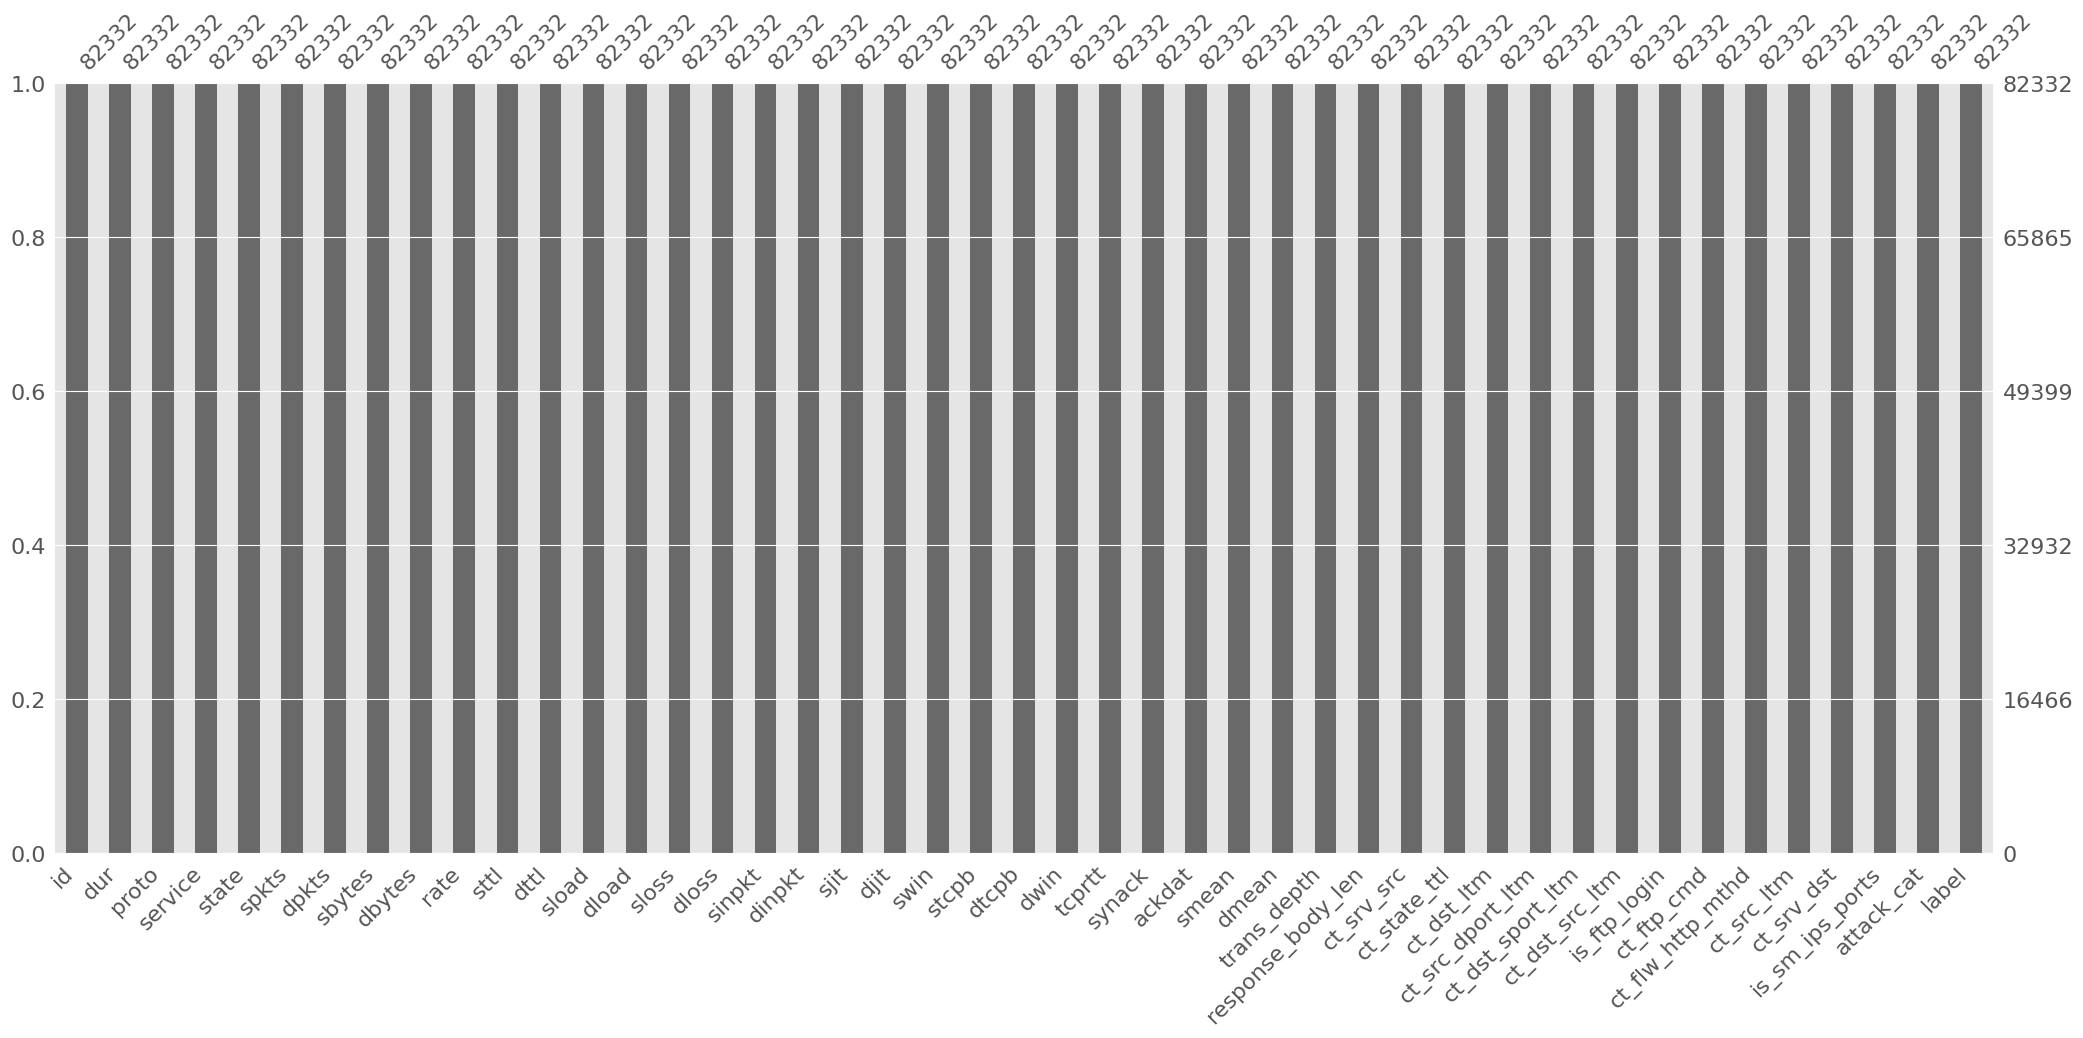

In [64]:
import missingno as msno

msno.bar(df)
plt.show()

Dễ thấy rằng bộ dữ liệu của chúng ta không bị khuyết thiếu ở trường nào. Ta có thể đi dến bước tiếp theo.

Check các giá trị có độ unique cao bằng lệnh `nunique()`

In [65]:
df.nunique()

id                   82332
dur                  39888
proto                  131
service                 13
state                    7
spkts                  420
dpkts                  436
sbytes                4489
dbytes                4034
rate                 40616
sttl                    11
dttl                     8
sload                42873
dload                40614
sloss                  253
dloss                  311
sinpkt               39970
dinpkt               37617
sjit                 39944
djit                 38381
swin                    11
stcpb                39219
dtcpb                39108
dwin                    14
tcprtt               26130
synack               24934
ackdat               24020
smean                 1282
dmean                 1222
trans_depth              8
response_body_len     1190
ct_srv_src              57
ct_state_ttl             7
ct_dst_ltm              50
ct_src_dport_ltm        50
ct_dst_sport_ltm        33
ct_dst_src_ltm          57
i

Đây là lượng giá trị riêng biệt của 1 attribute, ví dụ proto = 133 nghĩa là có 133 giao thức khác nhau

Ở đây, chúng ta sẽ loại bỏ 1 số cột không cần thiết như `id`, `attack_cat` vì chúng không quan trọng cho việc huấn luyện model.

Ở đây, chúng ta cũng loại bỏ cột `proto` vì cột này có giá trị dạng `string` và để máy có thể đọc được dữ liệu, chúng ta sẽ cần mã hóa. Nhưng vì cột này có tương đối nhiều giá trị riêng biệt, việc mã hóa sẽ trả về một lượng lớn cột giá trị, khiến ta khó quan sát được đầy đủ dữ liệu sau khi mã hóa và giảm độ chính xác của training model.

In [66]:
drop_att = ['id', 'attack_cat']

df.drop(drop_att, inplace=True, axis=1)
target = df['label']
df.drop(columns=['label'], inplace=True)
df.head(10)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,udp,-,INT,2,0,496,0,90909.09020,254,...,1,1,1,2,0,0,0,1,2,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00030,254,...,1,1,1,2,0,0,0,1,2,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00510,254,...,1,1,1,3,0,0,0,1,3,0
3,0.000006,udp,-,INT,2,0,900,0,166666.66080,254,...,2,2,1,3,0,0,0,2,3,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00250,254,...,2,2,1,3,0,0,0,2,3,0
5,0.000003,udp,-,INT,2,0,784,0,333333.32150,254,...,2,2,1,2,0,0,0,2,2,0
6,0.000006,udp,-,INT,2,0,1960,0,166666.66080,254,...,2,2,1,2,0,0,0,2,2,0
7,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,...,1,1,1,3,0,0,0,1,3,0
8,0.000000,arp,-,INT,1,0,46,0,0.00000,0,...,2,2,2,2,0,0,0,2,2,1
9,0.000000,arp,-,INT,1,0,46,0,0.00000,0,...,2,2,2,2,0,0,0,2,2,1


Lưu lại DataFrame thành csv trước khi tiến hành các bước tiếp theo.

In [67]:
df.to_csv('../Datasets/data_cleaned.csv', index=False)

## Chuyển dạng dữ liệu
Hiện tại trong dataset vẫn còn trường dữ liệu chứa chuỗi chứ không phải số. Vì vậy, trước khi tiến hành train model cũng như duy trì tính ổn định trong dataset, ta cần chuyển dữ liệu dạng String thành dạng số.

Kiểm tra các trường dữ liệu không có dạng số (`object`)

In [68]:
notNum = df.select_dtypes(include = ['object'])
notNum.head(10)

,proto,service,state
0,udp,-,INT
1,udp,-,INT
2,udp,-,INT
3,udp,-,INT
4,udp,-,INT
5,udp,-,INT
6,udp,-,INT
7,udp,-,INT
8,arp,-,INT
9,arp,-,INT


Kiểm tra các giá trị riêng biệt trong mỗi cột

In [69]:
for col in notNum.columns:
    print(f"{col}: \n{notNum[col].unique()}\n")

proto: 
['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' 'ptp' 'fire' 'crtp' 'crudp' 'scco

In [70]:
import category_encoders as ce

ordinal_encoder = ce.OrdinalEncoder(cols=notNum.columns[:-1])
notNum = ordinal_encoder.fit_transform(notNum)
notNum.head()

,proto,service,state
0,1,1,INT
1,1,1,INT
2,1,1,INT
3,1,1,INT
4,1,1,INT


In [71]:
dropState = notNum.drop(columns=['state'])
state = notNum['state']

In [72]:
dropState.head()

,proto,service
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [73]:
state.head()

0    INT
1    INT
2    INT
3    INT
4    INT
Name: state, dtype: object

In [74]:
state = pd.get_dummies(state, dtype=int)

### Giải thích về hàm get_dummies()

Giả sử chúng ta có một bảng như sau:
|Color|
|-----|
|Red|
|Blue|
|Green|
|Green|
|Red|

Sau khi chạy qua hàm `get_dummies`, bảng đó sẽ trở thành:
|Color_Red|Color_Blue|Color_Green|
|---------|----------|-----------|
|1|0|0|
|0|1|0|
|0|0|1|
|0|0|1|
|1|0|0|

Với 1 là xuất hiện, 0 là không xuất hiện

In [75]:
state.head()

,ACC,CLO,CON,FIN,INT,REQ,RST
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [76]:
#notNum = pd.concat([dropState, state], axis=1)

In [77]:
#notNum.head()

In [78]:
isNum = df.select_dtypes(include = ['int64', 'float64'])
isNum = pd.concat([isNum, dropState], axis=1)
isNum.head(10)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto,service
0,0.000011,2,0,496,0,90909.09020,254,0,1.803636e+08,0.0,...,1,2,0,0,0,1,2,0,1,1
1,0.000008,2,0,1762,0,125000.00030,254,0,8.810000e+08,0.0,...,1,2,0,0,0,1,2,0,1,1
2,0.000005,2,0,1068,0,200000.00510,254,0,8.544000e+08,0.0,...,1,3,0,0,0,1,3,0,1,1
3,0.000006,2,0,900,0,166666.66080,254,0,6.000000e+08,0.0,...,1,3,0,0,0,2,3,0,1,1
4,0.000010,2,0,2126,0,100000.00250,254,0,8.504000e+08,0.0,...,1,3,0,0,0,2,3,0,1,1
5,0.000003,2,0,784,0,333333.32150,254,0,1.045333e+09,0.0,...,1,2,0,0,0,2,2,0,1,1
6,0.000006,2,0,1960,0,166666.66080,254,0,1.306667e+09,0.0,...,1,2,0,0,0,2,2,0,1,1
7,0.000028,2,0,1384,0,35714.28522,254,0,1.977143e+08,0.0,...,1,3,0,0,0,1,3,0,1,1
8,0.000000,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,...,2,2,0,0,0,2,2,1,2,1
9,0.000000,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,...,2,2,0,0,0,2,2,1,2,1


## 3rd Stage: Chuẩn hóa dữ liệu

Trong dataset hiện tại (`data_cleaned.csv`), mặc dù các dữ liệu đã được làm sạch nhưng chưa được chuẩn hóa về cùng một dạng.

Vì vậy, khi đưa vào training, ta cần chuẩn hóa dữ liệu để tạo ra sự tương đồng và mối liên kết giũa các giá trị, giúp training hiệu quả hơn.

Ở đây, ta sử dụng StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(isNum)

In [80]:
scaled_df = pd.DataFrame(scaled_data, columns=isNum.columns, index=isNum.index)

In [81]:
scaled_df.head(10)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto,service
0,-0.213727,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.719440,-0.820395,0.643913,-0.263498,...,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607,-0.347610,-0.719547
1,-0.213728,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.719440,-0.820395,4.539351,-0.263498,...,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607,-0.347610,-0.719547
2,-0.213729,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.719440,-0.820395,4.391459,-0.263498,...,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.640033,-0.554273,-0.10607,-0.347610,-0.719547
3,-0.213729,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.719440,-0.820395,2.977031,-0.263498,...,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607,-0.347610,-0.719547
4,-0.213728,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.719440,-0.820395,4.369219,-0.263498,...,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607,-0.347610,-0.719547
5,-0.213729,-0.124455,-0.151816,-0.042006,-0.087369,1.688355,0.719440,-0.820395,5.453020,-0.263498,...,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.522990,-0.644190,-0.10607,-0.347610,-0.719547
6,-0.213729,-0.124455,-0.151816,-0.035154,-0.087369,0.566923,0.719440,-0.820395,6.905996,-0.263498,...,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.522990,-0.644190,-0.10607,-0.347610,-0.719547
7,-0.213724,-0.124455,-0.151816,-0.038510,-0.087369,-0.314202,0.719440,-0.820395,0.740380,-0.263498,...,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.640033,-0.554273,-0.10607,-0.347610,-0.719547
8,-0.213730,-0.131922,-0.151816,-0.046305,-0.087369,-0.554509,-1.782709,-0.820395,-0.358883,-0.263498,...,-0.281135,-0.477994,-0.090857,-0.090617,-0.203143,-0.522990,-0.644190,9.42773,-0.308159,-0.719547
9,-0.213730,-0.131922,-0.151816,-0.046305,-0.087369,-0.554509,-1.782709,-0.820395,-0.358883,-0.263498,...,-0.281135,-0.477994,-0.090857,-0.090617,-0.203143,-0.522990,-0.644190,9.42773,-0.308159,-0.719547


Tiến hành gộp 2 phần lại

In [82]:
df = pd.concat([scaled_df, state], axis=1)
df.head(10)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,is_sm_ips_ports,proto,service,ACC,CLO,CON,FIN,INT,REQ,RST
0,-0.213727,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.719440,-0.820395,0.643913,-0.263498,...,-0.10607,-0.347610,-0.719547,0,0,0,0,1,0,0
1,-0.213728,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.719440,-0.820395,4.539351,-0.263498,...,-0.10607,-0.347610,-0.719547,0,0,0,0,1,0,0
2,-0.213729,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.719440,-0.820395,4.391459,-0.263498,...,-0.10607,-0.347610,-0.719547,0,0,0,0,1,0,0
3,-0.213729,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.719440,-0.820395,2.977031,-0.263498,...,-0.10607,-0.347610,-0.719547,0,0,0,0,1,0,0
4,-0.213728,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.719440,-0.820395,4.369219,-0.263498,...,-0.10607,-0.347610,-0.719547,0,0,0,0,1,0,0
5,-0.213729,-0.124455,-0.151816,-0.042006,-0.087369,1.688355,0.719440,-0.820395,5.453020,-0.263498,...,-0.10607,-0.347610,-0.719547,0,0,0,0,1,0,0
6,-0.213729,-0.124455,-0.151816,-0.035154,-0.087369,0.566923,0.719440,-0.820395,6.905996,-0.263498,...,-0.10607,-0.347610,-0.719547,0,0,0,0,1,0,0
7,-0.213724,-0.124455,-0.151816,-0.038510,-0.087369,-0.314202,0.719440,-0.820395,0.740380,-0.263498,...,-0.10607,-0.347610,-0.719547,0,0,0,0,1,0,0
8,-0.213730,-0.131922,-0.151816,-0.046305,-0.087369,-0.554509,-1.782709,-0.820395,-0.358883,-0.263498,...,9.42773,-0.308159,-0.719547,0,0,0,0,1,0,0
9,-0.213730,-0.131922,-0.151816,-0.046305,-0.087369,-0.554509,-1.782709,-0.820395,-0.358883,-0.263498,...,9.42773,-0.308159,-0.719547,0,0,0,0,1,0,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   spkts              82332 non-null  float64
 2   dpkts              82332 non-null  float64
 3   sbytes             82332 non-null  float64
 4   dbytes             82332 non-null  float64
 5   rate               82332 non-null  float64
 6   sttl               82332 non-null  float64
 7   dttl               82332 non-null  float64
 8   sload              82332 non-null  float64
 9   dload              82332 non-null  float64
 10  sloss              82332 non-null  float64
 11  dloss              82332 non-null  float64
 12  sinpkt             82332 non-null  float64
 13  dinpkt             82332 non-null  float64
 14  sjit               82332 non-null  float64
 15  djit               82332 non-null  float64
 16  swin               823

Tiến hành gộp các cột dữ liệu đã qua xử lý với các cột còn lại ở bảng gốc vào 1 dataframe cuối cùng `full_scaled_df.csv`

In [84]:
full_scaled_df = pd.concat([df, target], axis = 1)
full_scaled_df.head(10)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto,service,ACC,CLO,CON,FIN,INT,REQ,RST,label
0,-0.213727,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.719440,-0.820395,0.643913,-0.263498,...,-0.347610,-0.719547,0,0,0,0,1,0,0,0
1,-0.213728,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.719440,-0.820395,4.539351,-0.263498,...,-0.347610,-0.719547,0,0,0,0,1,0,0,0
2,-0.213729,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.719440,-0.820395,4.391459,-0.263498,...,-0.347610,-0.719547,0,0,0,0,1,0,0,0
3,-0.213729,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.719440,-0.820395,2.977031,-0.263498,...,-0.347610,-0.719547,0,0,0,0,1,0,0,0
4,-0.213728,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.719440,-0.820395,4.369219,-0.263498,...,-0.347610,-0.719547,0,0,0,0,1,0,0,0
5,-0.213729,-0.124455,-0.151816,-0.042006,-0.087369,1.688355,0.719440,-0.820395,5.453020,-0.263498,...,-0.347610,-0.719547,0,0,0,0,1,0,0,0
6,-0.213729,-0.124455,-0.151816,-0.035154,-0.087369,0.566923,0.719440,-0.820395,6.905996,-0.263498,...,-0.347610,-0.719547,0,0,0,0,1,0,0,0
7,-0.213724,-0.124455,-0.151816,-0.038510,-0.087369,-0.314202,0.719440,-0.820395,0.740380,-0.263498,...,-0.347610,-0.719547,0,0,0,0,1,0,0,0
8,-0.213730,-0.131922,-0.151816,-0.046305,-0.087369,-0.554509,-1.782709,-0.820395,-0.358883,-0.263498,...,-0.308159,-0.719547,0,0,0,0,1,0,0,0
9,-0.213730,-0.131922,-0.151816,-0.046305,-0.087369,-0.554509,-1.782709,-0.820395,-0.358883,-0.263498,...,-0.308159,-0.719547,0,0,0,0,1,0,0,0


Tiến hành export file cuối cùng

In [85]:
full_scaled_df.to_csv('../Datasets/full_scaled_data.csv', index=False)